In [2]:
# 2 Getting the data 

In [3]:
import pandas as pd

# Read the .csv file
try:
    df = pd.read_csv('marketing_customer_analysis (4).csv')
    print("CSV file loaded successfully.")
    print(f"Dataset shape: {df.shape}")
    print("\nFirst 5 rows of the dataset:")
    print(df.head())
except FileNotFoundError:
    print("Error: 'marketing_customer_analysis (4).csv' not found. Please ensure the file is in the correct directory.")
    # Exit or handle the error appropriately if the file isn't found
except Exception as e:
    print(f"An error occurred while reading the CSV: {e}")

CSV file loaded successfully.
Dataset shape: (9134, 24)

First 5 rows of the dataset:
  Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income  ...  \
0           2/24/11         Employed      F   56274  ...   
1           1/31/11       Unemployed      F       0  ...   
2           2/19/11         Employed      F   48767  ...   
3           1/20/11       Unemployed      M       0  ...   
4            2/3/11         Employed      M   43836  ...   

  Months Since Policy Inception Number of Open Complaints  Number of Pol

In [ ]:
# 3 Data cleaning / wrangling 


--- Column Headers Standardized ---
Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

--- Handling NaN Values ---
Missing values before handling:
customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_stat

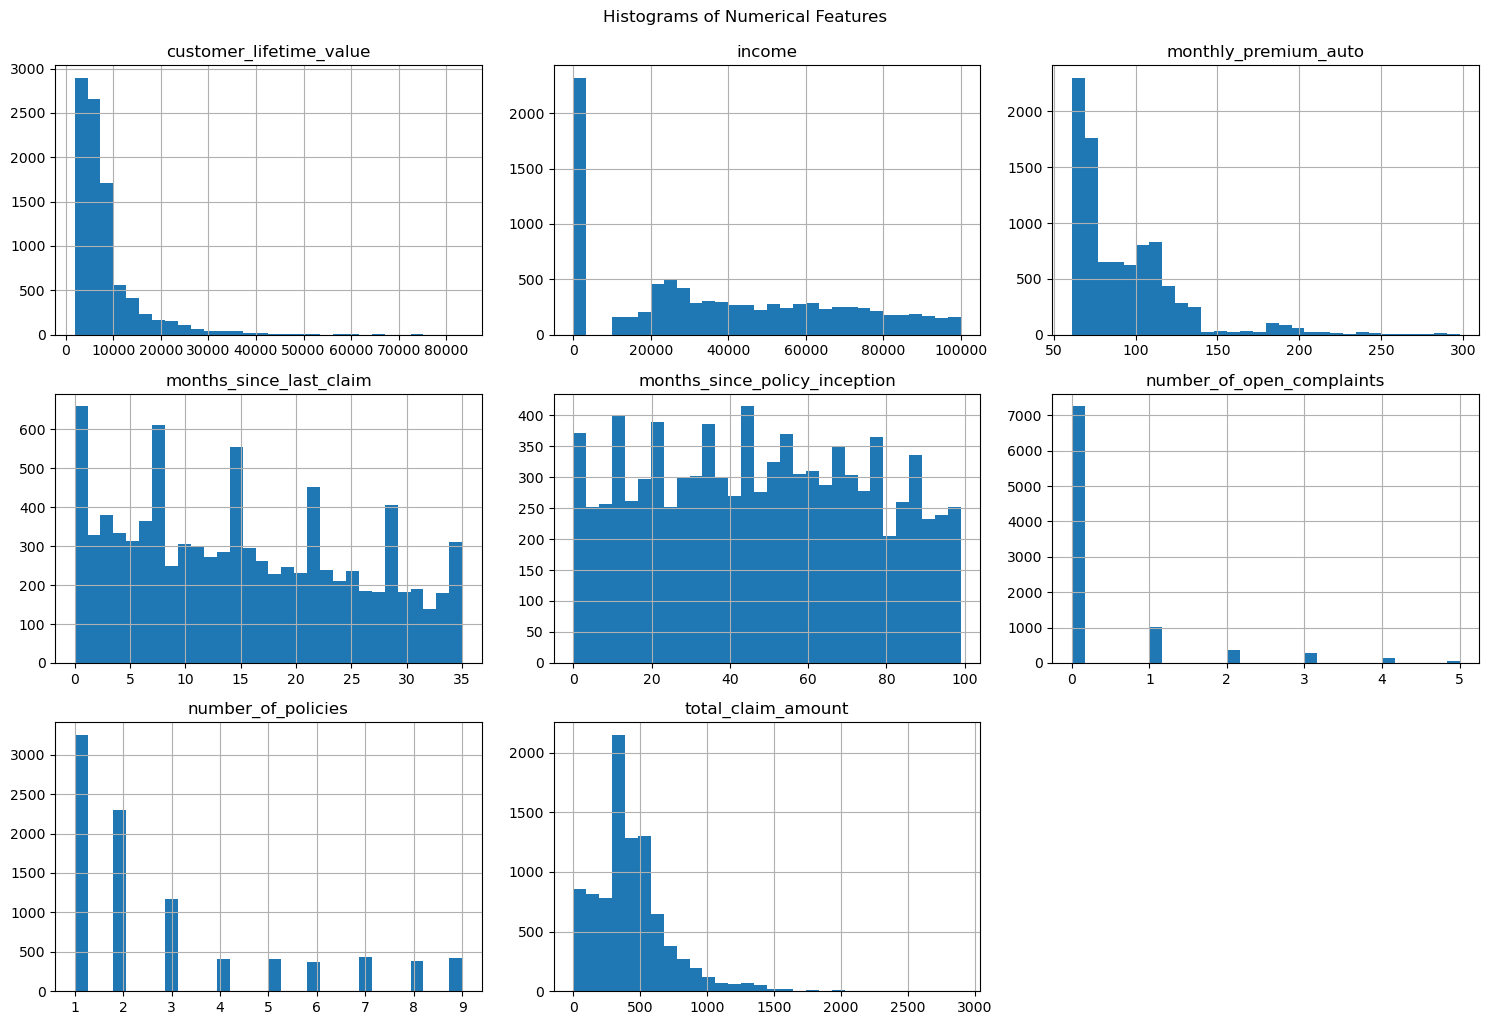


Generating Box Plots for Numerical Features...


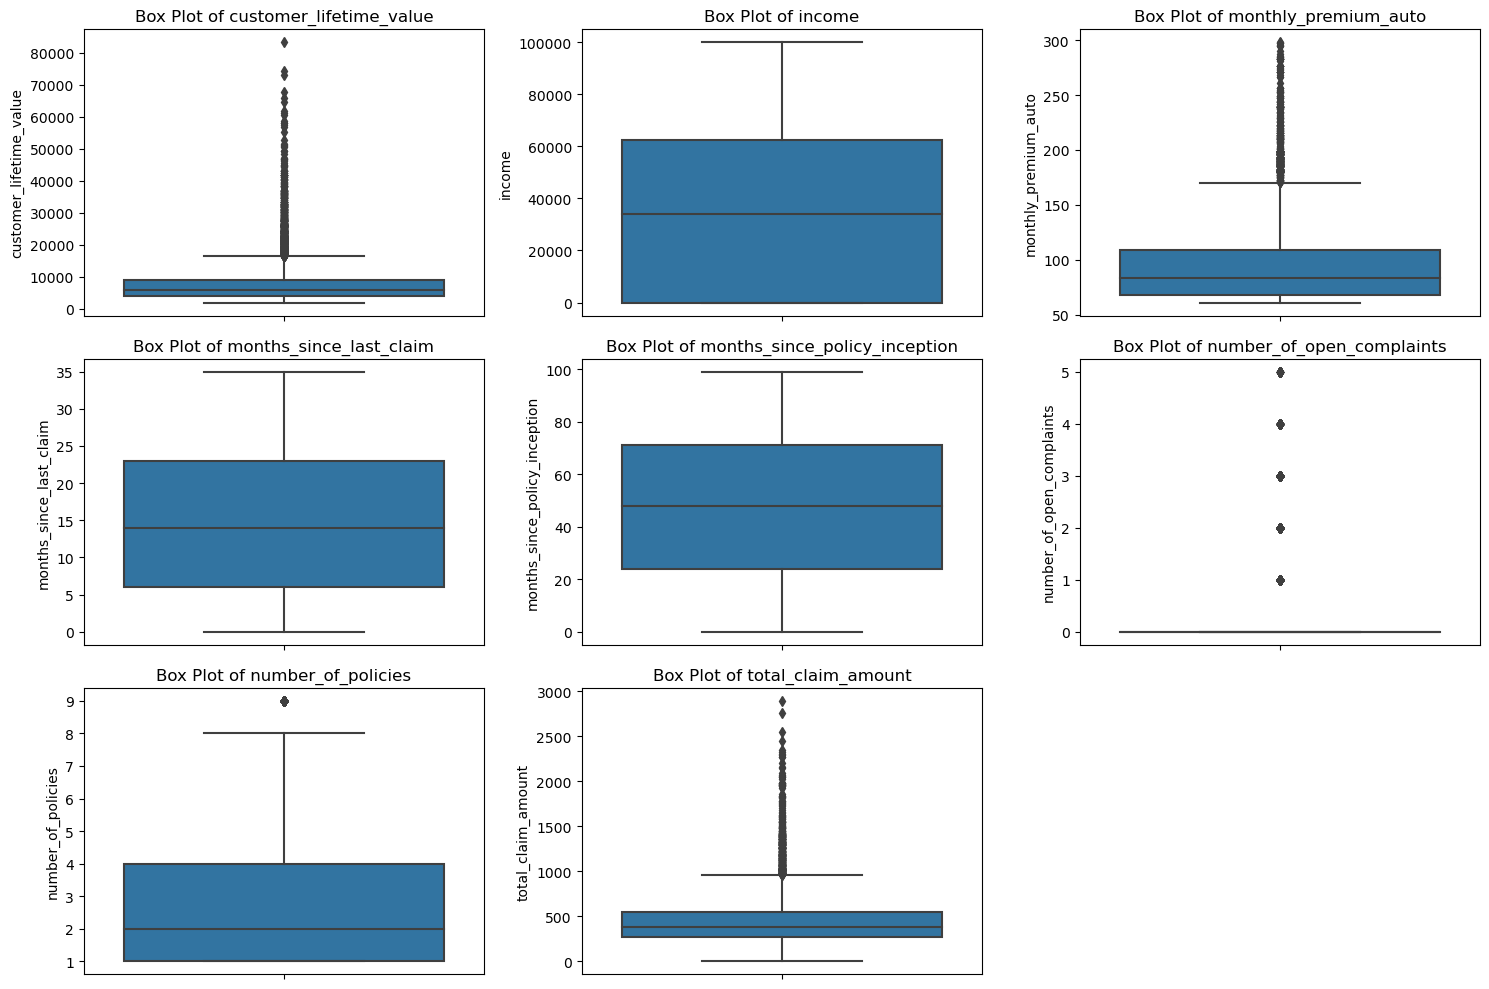


Generating Count Plots for Categorical Features (top 10 categories)...


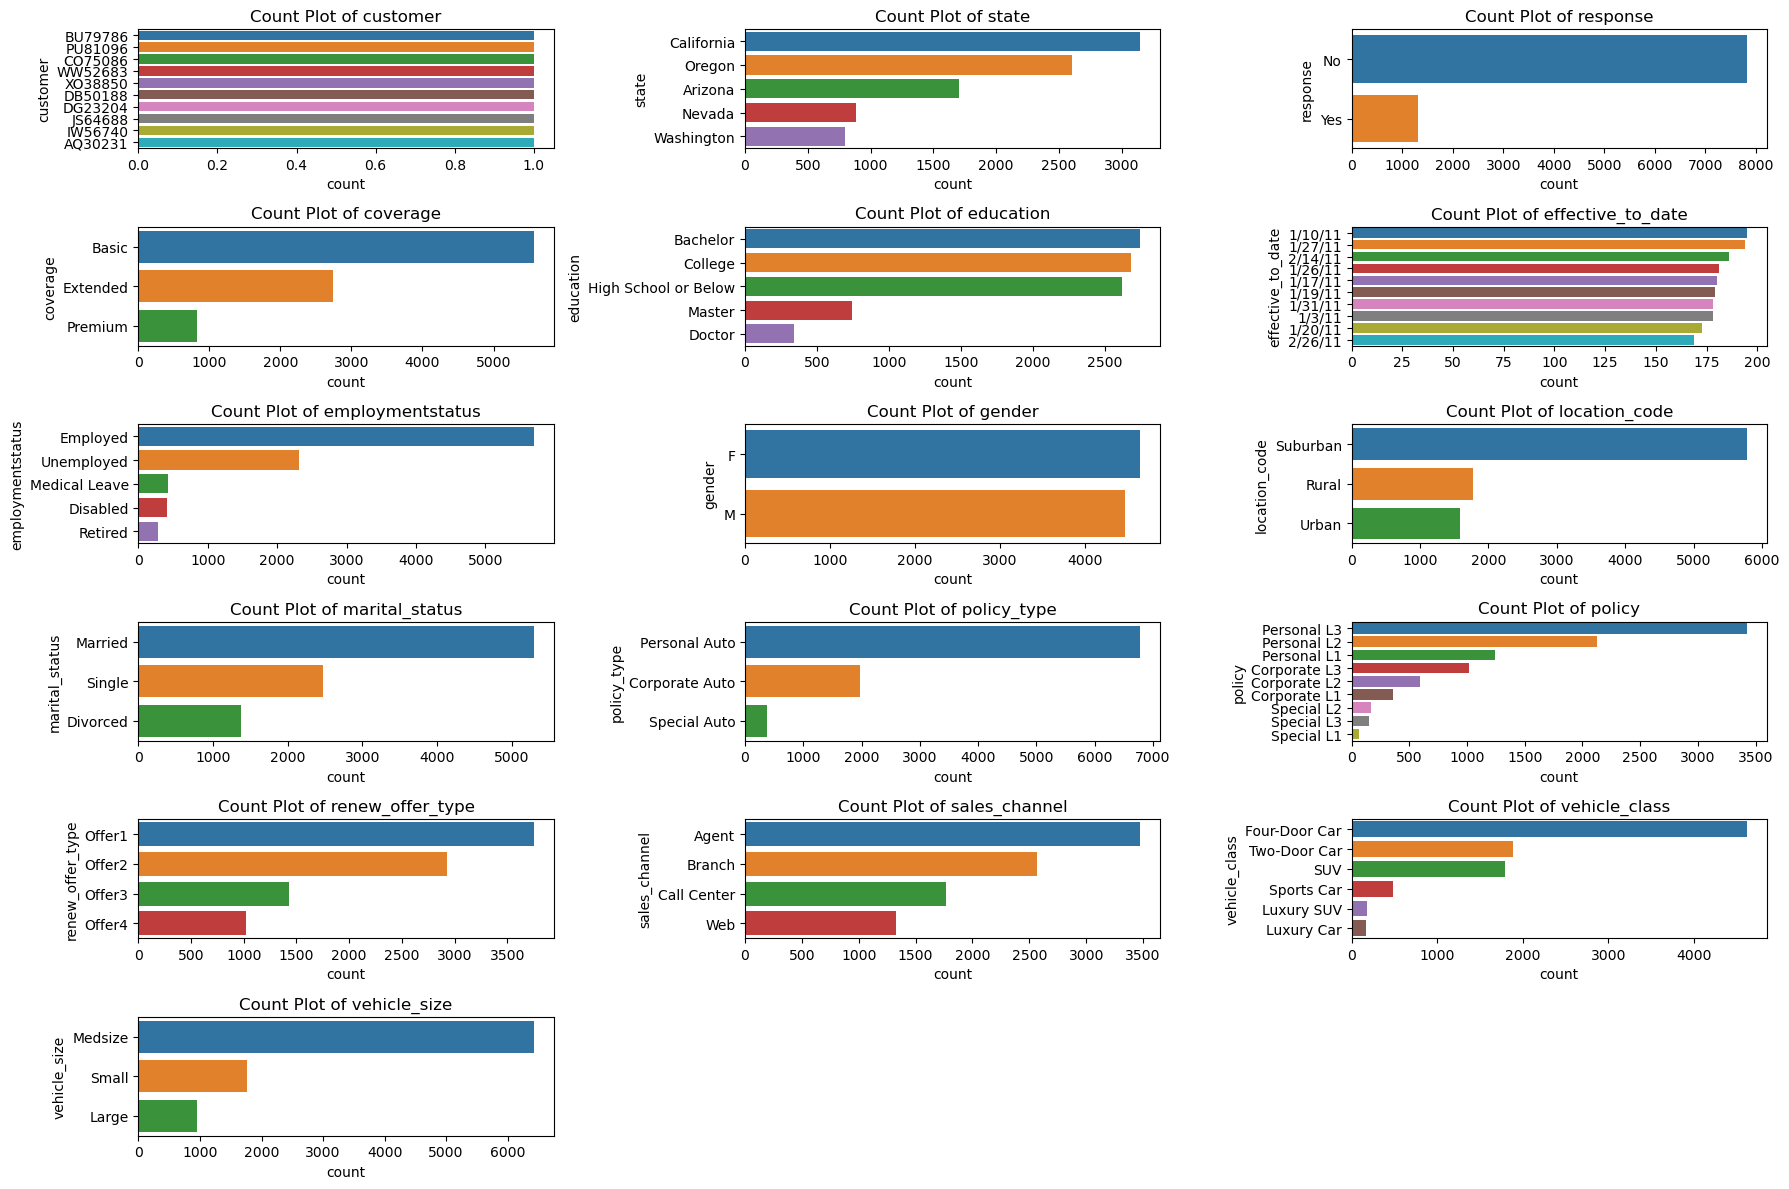


Generating Correlation Matrix Heatmap for Numerical Features...


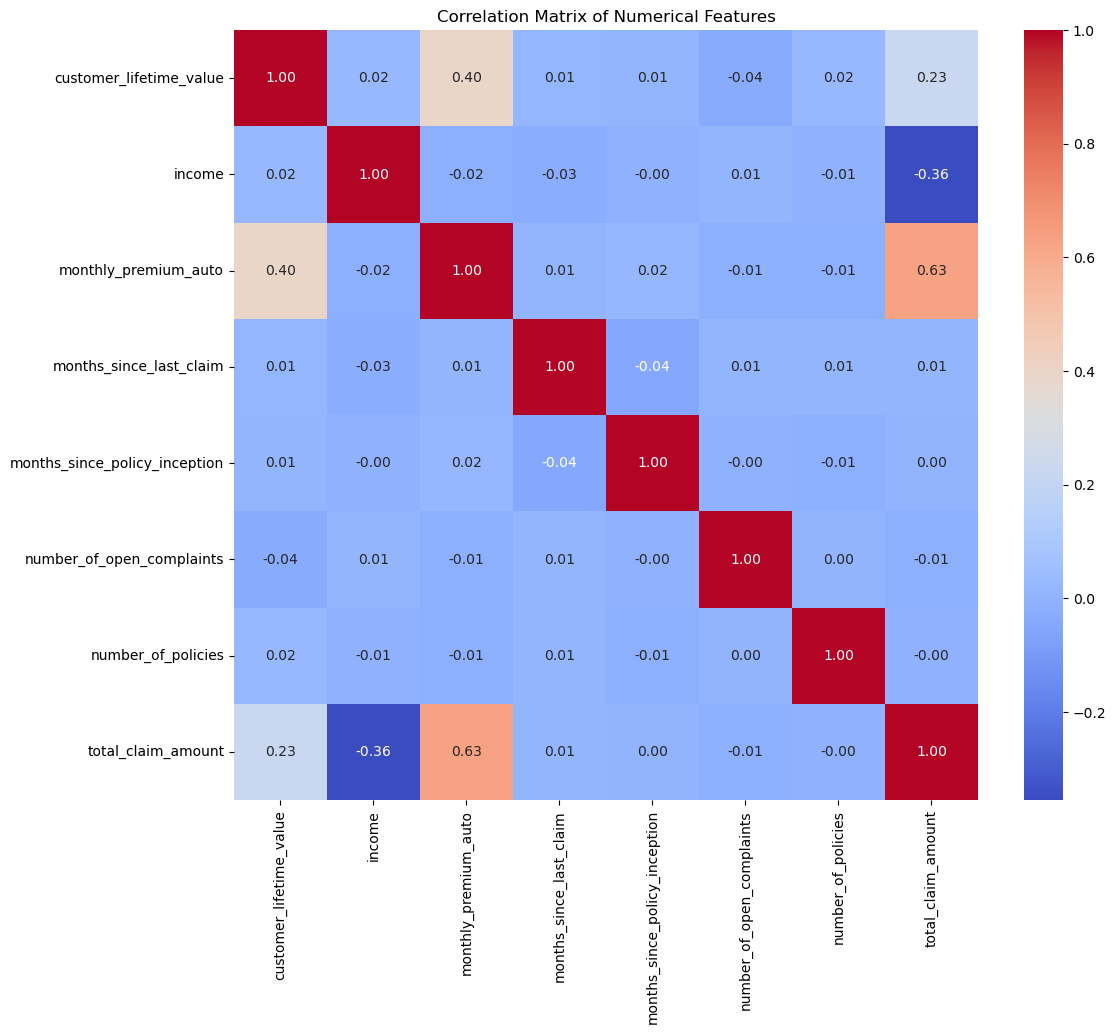

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make a copy to preserve the original dataframe
df_cleaned = df.copy()

# 1. Change headers names
# Standardize column names (lowercase, replace spaces with underscores)
df_cleaned.columns = df_cleaned.columns.str.lower().str.replace(' ', '_')
print("\n--- Column Headers Standardized ---")
print(df_cleaned.columns)

# 2. Deal with NaN values
print("\n--- Handling NaN Values ---")
print("Missing values before handling:")
print(df_cleaned.isnull().sum())

# Strategy for NaN values (example - will adjust based on actual data inspection):
# For numerical columns, fill with median or mean.
# For categorical columns, fill with mode or 'Unknown'.

# Identify numerical and categorical columns
numerical_cols = df_cleaned.select_dtypes(include=np.number).columns
categorical_cols = df_cleaned.select_dtypes(include='object').columns

for col in numerical_cols:
    if df_cleaned[col].isnull().sum() > 0:
        median_val = df_cleaned[col].median()
        df_cleaned[col].fillna(median_val, inplace=True)
        print(f"Filled NaN in numerical column '{col}' with median: {median_val}")

for col in categorical_cols:
    if df_cleaned[col].isnull().sum() > 0:
        mode_val = df_cleaned[col].mode()[0]
        df_cleaned[col].fillna(mode_val, inplace=True) # or 'Unknown' depending on context
        print(f"Filled NaN in categorical column '{col}' with mode: {mode_val}")

print("\nMissing values after handling:")
print(df_cleaned.isnull().sum())

# 3. Categorical Features & 4. Numerical Features (Initial Exploration)
print("\n--- Initial Feature Exploration ---")
print("\nCategorical Features:")
for col in categorical_cols:
    print(f"- {col}: {df_cleaned[col].nunique()} unique values")
    if df_cleaned[col].nunique() < 20: # Display value counts for columns with fewer unique values
        print(df_cleaned[col].value_counts())
    print("-" * 30)

print("\nNumerical Features:")
print(df_cleaned[numerical_cols].describe().T)

# 5. Exploration (EDA)
print("\n--- Exploratory Data Analysis (EDA) ---")

# Histograms for numerical features
print("\nGenerating Histograms for Numerical Features...")
df_cleaned[numerical_cols].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.suptitle('Histograms of Numerical Features', y=1.02)
plt.show()

# Box plots for numerical features (to identify outliers and distribution)
print("\nGenerating Box Plots for Numerical Features...")
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols)//3 + 1, 3, i + 1)
    sns.boxplot(y=df_cleaned[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

# Count plots for categorical features
print("\nGenerating Count Plots for Categorical Features (top 10 categories)...")
plt.figure(figsize=(18, 12))
for i, col in enumerate(categorical_cols):
    plt.subplot(len(categorical_cols)//3 + 1, 3, i + 1)
    sns.countplot(y=df_cleaned[col], order=df_cleaned[col].value_counts().index[:10]) # Top 10 categories
    plt.title(f'Count Plot of {col}')
plt.tight_layout()
plt.show()

# Correlation Matrix for numerical features
print("\nGenerating Correlation Matrix Heatmap for Numerical Features...")
plt.figure(figsize=(12, 10))
sns.heatmap(df_cleaned[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Pairplot for a subset of numerical features if there are too many
# (Choose relevant features if the dataset is large)
# sns.pairplot(df_cleaned[numerical_cols[:5]]) # Example for first 5 numerical features
# plt.suptitle('Pair Plot of Numerical Features', y=1.02)
# plt.show()

In [ ]:
# 4 Data processing 

In [5]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Make a copy for processing
df_processed = df_cleaned.copy()

# Define Target Variable (example: 'customer_lifetime_value')
# You'll need to confirm the actual target column based on your EDA.
# If no clear numerical target for regression, we might switch to classification or clustering.
# For this example, let's assume 'customer_lifetime_value' is our target.
if 'customer_lifetime_value' in df_processed.columns:
    target = 'customer_lifetime_value'
    X = df_processed.drop(columns=[target])
    y = df_processed[target]
    problem_type = 'regression'
    print(f"\nTarget variable identified: '{target}' (Regression Problem)")
else:
    # If no clear numerical target, let's look for a categorical target for classification, e.g., 'response'
    if 'response' in df_processed.columns:
        target = 'response'
        X = df_processed.drop(columns=[target])
        y = df_processed[target]
        problem_type = 'classification'
        print(f"\nTarget variable identified: '{target}' (Classification Problem)")
    else:
        print("\nNo obvious target variable ('customer_lifetime_value' or 'response') found.")
        print("Please define your target variable manually based on your problem statement and data exploration.")
        # For demonstration, let's pick a numerical column as a dummy target if no clear one.
        # This part might need manual adjustment based on the actual dataset.
        if len(numerical_cols) > 0 and 'customer_lifetime_value' not in df_processed.columns:
            target = numerical_cols[0] # Using the first numerical column as dummy target
            X = df_processed.drop(columns=[target])
            y = df_processed[target]
            problem_type = 'regression'
            print(f"Using '{target}' as a dummy target for demonstration purposes (Regression Problem).")
        else:
            print("Cannot proceed without a target variable. Exiting processing stage.")
            # You would typically raise an error or halt execution here.
            exit() # Exit for now, but in a notebook you might just not run subsequent cells


# Separate numerical and categorical features for X
numerical_features_X = X.select_dtypes(include=np.number).columns
categorical_features_X = X.select_dtypes(include='object').columns

# 1. Dealing with outliers (using IQR method for numerical features)
# This step can be done before or after normalization depending on the chosen normalization method.
# For StandardScaler, it's often better to deal with outliers first.
print("\n--- Dealing with Outliers (IQR Method) ---")
for col in numerical_features_X:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap outliers
    outlier_count = X[(X[col] < lower_bound) | (X[col] > upper_bound)].shape[0]
    if outlier_count > 0:
        X[col] = np.where(X[col] < lower_bound, lower_bound, X[col])
        X[col] = np.where(X[col] > upper_bound, upper_bound, X[col])
        print(f"Capped {outlier_count} outliers in column '{col}'.")
    else:
        print(f"No significant outliers found in column '{col}' to cap.")


# 2. Normalization (using StandardScaler for numerical features)
# You might choose MinMaxScaler or PowerTransformer as well.
print("\n--- Normalization (StandardScaler) ---")
scaler = StandardScaler()
X[numerical_features_X] = scaler.fit_transform(X[numerical_features_X])
print("Numerical features normalized using StandardScaler.")
print(X[numerical_features_X].head())


# 3. Encoding Categorical Data (One-Hot Encoding)
print("\n--- Encoding Categorical Data (One-Hot Encoding) ---")
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # sparse_output=False for dense array
encoded_features = encoder.fit_transform(X[categorical_features_X])
encoded_feature_names = encoder.get_feature_names_out(categorical_features_X)
X_encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names, index=X.index)

# Drop original categorical columns and concatenate encoded ones
X = X.drop(columns=categorical_features_X)
X = pd.concat([X, X_encoded_df], axis=1)
print("Categorical features One-Hot Encoded.")
print(X.head())


# 4. Splitting into train set and test set
print("\n--- Splitting Data into Train and Test Sets ---")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


Target variable identified: 'customer_lifetime_value' (Regression Problem)

--- Dealing with Outliers (IQR Method) ---
No significant outliers found in column 'income' to cap.
Capped 430 outliers in column 'monthly_premium_auto'.
No significant outliers found in column 'months_since_last_claim' to cap.
No significant outliers found in column 'months_since_policy_inception' to cap.
Capped 1882 outliers in column 'number_of_open_complaints'.
Capped 416 outliers in column 'number_of_policies'.
Capped 453 outliers in column 'total_claim_amount'.

--- Normalization (StandardScaler) ---
Numerical features normalized using StandardScaler.
     income  monthly_premium_auto  months_since_last_claim  \
0  0.612827             -0.791655                 1.678099   
1 -1.239617              0.088171                -0.208186   
2  0.365710              0.580874                 0.288205   
3 -1.239617              0.510488                 0.288205   
4  0.203390             -0.650882                

In [ ]:
# 5 Data modelling 

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Choose a model based on the problem type identified earlier
if problem_type == 'regression':
    print("\n--- Applying Regression Model (Linear Regression) ---")
    model = LinearRegression()
    # You could also try:
    # model = RandomForestRegressor(random_state=42)
elif problem_type == 'classification':
    print("\n--- Applying Classification Model (Decision Tree Classifier) ---")
    model = DecisionTreeClassifier(random_state=42)
    # You could also try:
    # model = RandomForestClassifier(random_state=42)
else:
    print("\nProblem type not defined. Cannot apply model.")
    # You might want to raise an error or set a default model here.
    exit()

# Train the model
model.fit(X_train, y_train)
print(f"Model ({type(model).__name__}) trained successfully.")

# Make predictions
y_pred = model.predict(X_test)
print("Predictions made on the test set.")


--- Applying Regression Model (Linear Regression) ---
Model (LinearRegression) trained successfully.
Predictions made on the test set.


In [ ]:
# 6 Model validation 

In [7]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("\n--- Model Validation ---")

if problem_type == 'regression':
    # R2 Score
    r2 = r2_score(y_test, y_pred)
    print(f"R-squared (R2): {r2:.4f}")

    # Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error (MSE): {mse:.4f}")

    # Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

    # Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"Mean Absolute Error (MAE): {mae:.4f}")

elif problem_type == 'classification':
    # For classification, we need to convert probabilities to class labels if using a model that outputs probabilities
    # For DecisionTreeClassifier, predict gives class labels directly.
    # For other models like LogisticRegression, you might need y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    # Precision, Recall, F1-score (for binary classification, specify average for multi-class)
    # If y is multi-class, use average='weighted' or 'macro'
    if y_test.nunique() == 2: # Binary classification
        precision = precision_score(y_test, y_pred, pos_label=y_test.unique()[0] if y_test.unique()[0] else None) # Assuming 0/1 or similar, adjust pos_label if needed
        recall = recall_score(y_test, y_pred, pos_label=y_test.unique()[0] if y_test.unique()[0] else None)
        f1 = f1_score(y_test, y_pred, pos_label=y_test.unique()[0] if y_test.unique()[0] else None)
    else: # Multi-class classification
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # ROC AUC (for binary classification)
    if y_test.nunique() == 2 and hasattr(model, 'predict_proba'):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        print(f"ROC AUC: {roc_auc:.4f}")

else:
    print("No specific metrics for the problem type identified.")


--- Model Validation ---
R-squared (R2): 0.1579
Mean Squared Error (MSE): 43398515.4171
Root Mean Squared Error (RMSE): 6587.7550
Mean Absolute Error (MAE): 3982.4039
